In [1]:
import pandas as pd
import numpy as np

path = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/module_5_auto.csv'
df = pd.read_csv(path)
df.head()

,Unnamed: 0.1,Unnamed: 0,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,0,0,3,122,alfa-romero,std,two,convertible,rwd,front,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,1,1,3,122,alfa-romero,std,two,convertible,rwd,front,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,2,2,1,122,alfa-romero,std,two,hatchback,rwd,front,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,3,3,2,164,audi,std,four,sedan,fwd,front,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,4,4,2,164,audi,std,four,sedan,4wd,front,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


In [2]:
df = df._get_numeric_data()
df.head()

,Unnamed: 0.1,Unnamed: 0,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,...,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
0,0,0,3,122,88.6,0.811148,0.890278,48.8,2548,130,...,2.68,9.0,111.0,5000.0,21,27,13495.0,11.190476,0,1
1,1,1,3,122,88.6,0.811148,0.890278,48.8,2548,130,...,2.68,9.0,111.0,5000.0,21,27,16500.0,11.190476,0,1
2,2,2,1,122,94.5,0.822681,0.909722,52.4,2823,152,...,3.47,9.0,154.0,5000.0,19,26,16500.0,12.368421,0,1
3,3,3,2,164,99.8,0.848630,0.919444,54.3,2337,109,...,3.40,10.0,102.0,5500.0,24,30,13950.0,9.791667,0,1
4,4,4,2,164,99.4,0.848630,0.922222,54.3,2824,136,...,3.40,8.0,115.0,5500.0,18,22,17450.0,13.055556,0,1


In [3]:
from ipywidgets import interact, interactive, interact_manual

In [4]:
def distribution_plot(RedFunction, BlueFunction, RedName, BlueName, Title):
    width=12
    height=10
    plt.figure(figsize=(width,height))
    ax1 = sns.kdeplot(RedFunction, color='r', label=RedName)
    ax2 = sns.kdeplot(BlueFunction, color='b', label=BlueName, ax=ax1)
    plt.title(Title)
    plt.xlabel('Price (USD)')
    plt.ylabel('Proportion of Cars')
    plt.show()
    plt.close

In [5]:
def poly_plot(xtrain,xtest,y_train,y_test, lr , poly_transform):
    width=12
    height=10
    plt.figure(figsize=(width,height))
    xmax = max([xtrain.values.max(), xtest.values.max()])
    xmin = min([xtrain.values.min(), xtest.values.min()])
    x = np.arange(xmin,xmax,0.1)
    plt.plot(xtrain,y_train, 'ro', label='Training Data')
    plt.plot(xtest,y_test, 'go', label='Test Data')
    plt.plot(x,lr.predict(poly_transform.fit_transform(x.reshape(-1,1))),label='Predicted Function')
    plt.ylim([-10000,60000])
    plt.ylabel('Price (USD)')
    plt.legend()

In [6]:
y_data = df['price']
x_data = df.drop('price',axis=1)

In [7]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.1, random_state=1)
print('Number of Test Samples - {}\nNumber of Training Samples - {}'.format(x_test.shape[0],x_train.shape[0]))

Number of Test Samples - 21
Number of Training Samples - 180


In [8]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(x_data, y_data, test_size=0.4, random_state=0)

In [9]:
from sklearn.linear_model import LinearRegression
lre = LinearRegression()
lre

LinearRegression()

In [10]:
lre.fit(x_train[['horsepower']], y_train)

LinearRegression()

In [11]:
lre.score(x_test[['horsepower']], y_test)

0.36358755750788274

In [12]:
lre.score(x_train[['horsepower']],y_train)

0.6619724197515104

In [13]:
lre1 = LinearRegression()
lre1.fit(x_train1[['horsepower']], y_train1)
lre1

LinearRegression()

In [14]:
lre1.score(x_test1[['horsepower']],y_test1)

0.7139364665406973

In [15]:
lre1.score(x_train1[['horsepower']],y_train1)

0.5754067463583004

In [16]:
from sklearn.model_selection import cross_val_score

In [17]:
# 'cv' determines the number of folds
Rcross = cross_val_score(lre, x_data[['horsepower']], y_data, cv=4)
Rcross

array([0.7746232 , 0.51716687, 0.74785353, 0.04839605])

In [18]:
print('Mean of Folds - {}\nStandard Deviation of Folds - {}'.format(Rcross.mean(), Rcross.std()))

Mean of Folds - 0.5220099150421195
Standard Deviation of Folds - 0.2911839444756025


In [19]:
-1 * cross_val_score(lre, x_data[['horsepower']], y_data, cv=4, scoring='neg_mean_squared_error')

array([20254142.84026704, 43745493.26505169, 12539630.34014929,
       17561927.72247588])

In [20]:
Rcross1 = cross_val_score(lre,x_data[['horsepower']], y_data, cv=2)
Rcross1

array([0.59015621, 0.44319613])

In [21]:
print('mean of folds for two folds - {}\nstandard deviation of folds for two folds - {}'.format(Rcross1.mean(),Rcross1.std()))

mean of folds for two folds - 0.5166761697127429
standard deviation of folds for two folds - 0.0734800419577139


In [22]:
from sklearn.model_selection import cross_val_predict
yhat = cross_val_predict(lre,x_data[['horsepower']], y_data, cv=4)
yhat[:5]

array([14141.63807508, 14141.63807508, 20814.29423473, 12745.03562306,
       14762.35027598])

In [23]:
lr = LinearRegression()
lr.fit(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_train)

LinearRegression()

In [24]:
yhat_train = lr.predict(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])
yhat_train[:5]

array([ 7426.6731551 , 28323.75090803, 14213.38819709,  4052.34146983,
       34500.19124244])

In [25]:
yhat_test = lr.predict(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])
yhat_test[:5]

array([11349.35089149,  5884.11059106, 11208.6928275 ,  6641.07786278,
       15565.79920282])

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

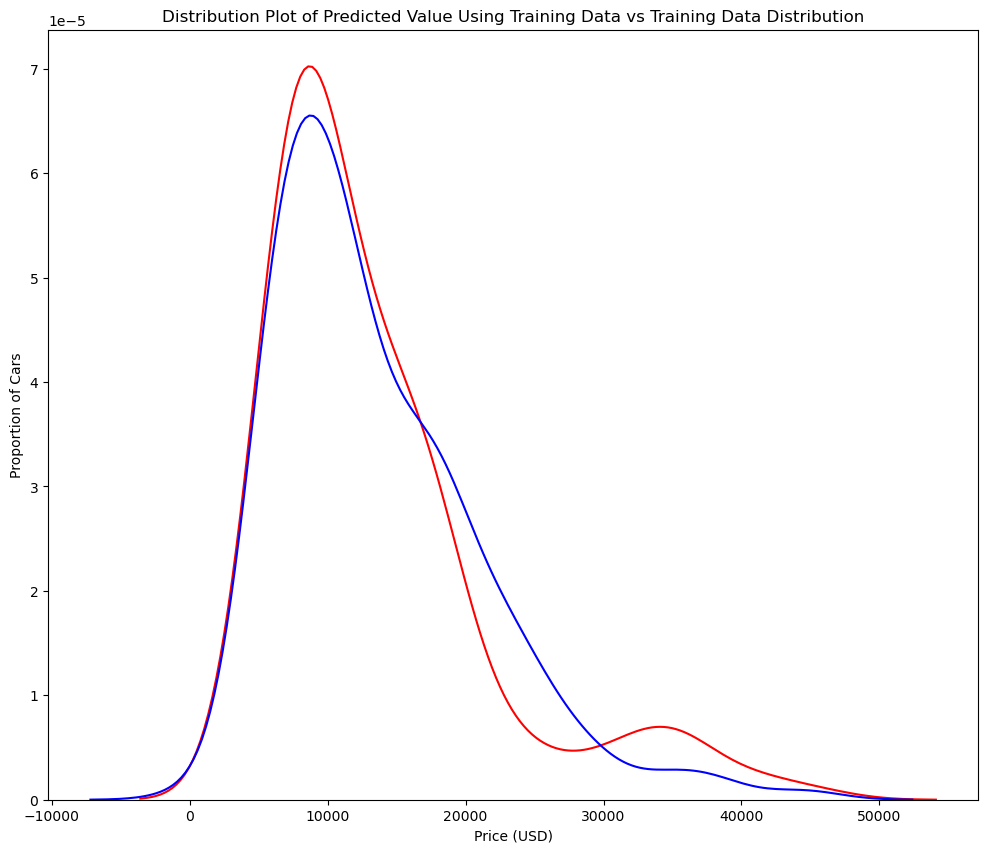

In [27]:
Title = 'Distribution Plot of Predicted Value Using Training Data vs Training Data Distribution'
distribution_plot(y_train,yhat_train, "Actual Values(Train)", "Predicted Values (Train)", Title)

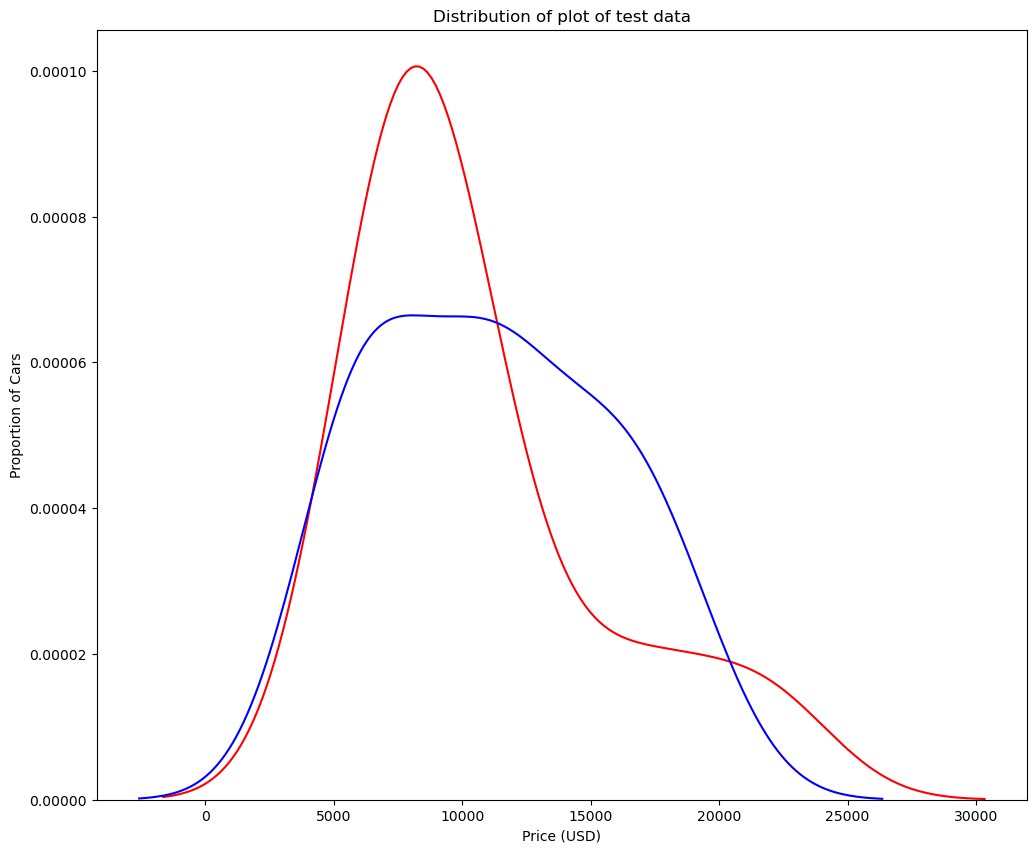

In [28]:
Title = 'Distribution of plot of test data'
distribution_plot(y_test,yhat_test, 'Actual Values (Test)', 'Predicted Values(Test)', Title)

In [29]:
from sklearn.preprocessing import PolynomialFeatures

In [30]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.45, random_state=0)
pr = PolynomialFeatures(degree=5)
x_train_pr = pr.fit_transform(x_train[['horsepower']])
x_test_pr = pr.fit_transform(x_test[['horsepower']])
pr

PolynomialFeatures(degree=5)

In [31]:
poly = LinearRegression()
poly.fit(x_train_pr,y_train)

LinearRegression()

In [32]:
yhat = poly.predict(x_test_pr)
print('Predicted Values - {} \nTest Values - {}'.format(yhat[:4],y_test[:4].values))

Predicted Values - [ 6728.7502107   7308.07521287 12213.82613256 18893.10516248] 
Test Values - [ 6295. 10698. 13860. 13499.]


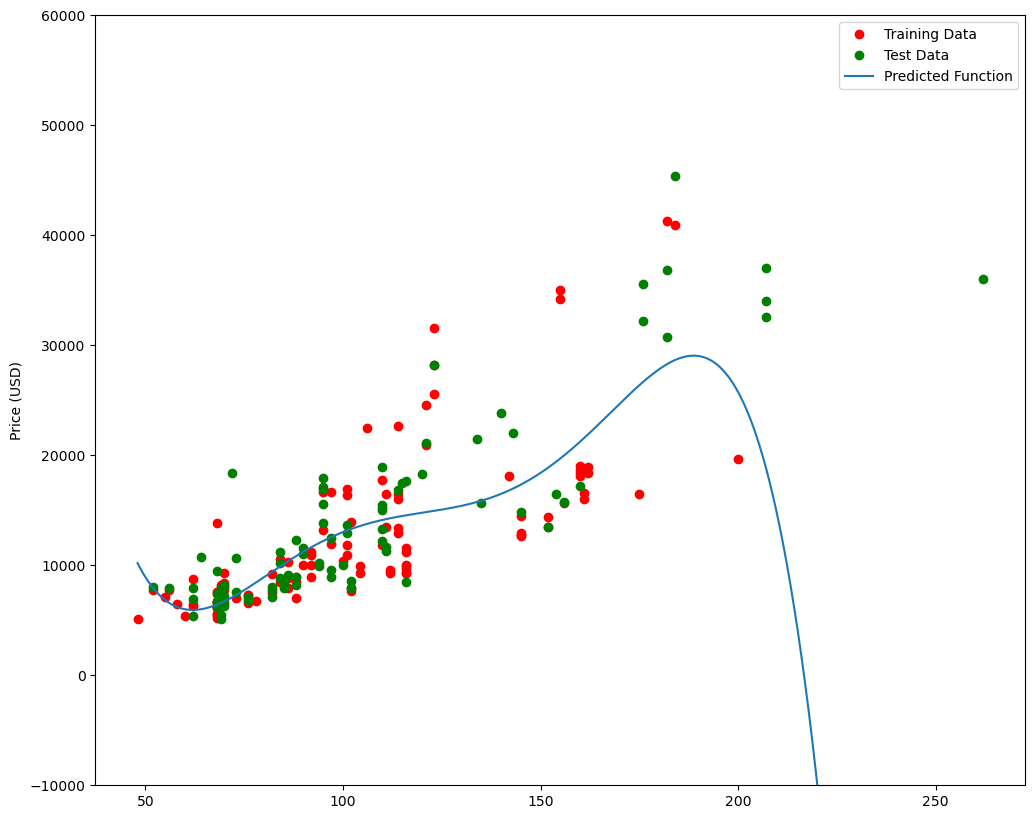

In [33]:
poly_plot(x_train['horsepower'], x_test['horsepower'], y_train, y_test, poly,pr)

In [34]:
poly.score(x_train_pr,y_train)

0.5567716901486396

In [35]:
poly.score(x_test_pr,y_test)

-29.871647960628927

Text(3, 0.75, 'Max R^2')

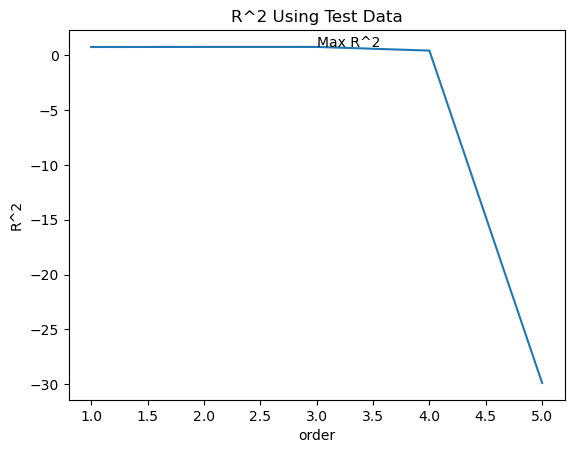

In [36]:
Rsqu_test = []

for n in range(1,6):
    pr = PolynomialFeatures(degree=n)
    x_train_pr = pr.fit_transform(x_train[['horsepower']])
    x_test_pr = pr.fit_transform(x_test[['horsepower']])
    lr.fit(x_train_pr,y_train)
    Rsqu_test.append(lr.score(x_test_pr, y_test))
 
plt.plot([1,2,3,4,5], Rsqu_test)
plt.xlabel('order')
plt.ylabel('R^2')
plt.title('R^2 Using Test Data')
plt.text(3,0.75,'Max R^2')

In [39]:
def f(order, test_data):
    x_train,x_test, y_train,y_test = train_test_split(x_data, y_data, test_size=test_data, random_state=0)
    pr = PolynomialFeatures(degree=order)
    x_train_pr = pr.fit_transform(x_train[['horsepower']])
    x_test_pr = pr.fit_transform(x_test[['horsepower']])
    poly = LinearRegression()
    poly.fit(x_train_pr,y_train)
    poly_plot(x_train['horsepower'], x_test['horsepower'], y_train, y_test, poly, pr)

In [40]:
interact(f, order=(0,6,1), test_data = (.05,.95,.05))

interactive(children=(IntSlider(value=3, description='order', max=6), FloatSlider(value=0.45, description='tes…

<function __main__.f(order, test_data)>

In [41]:
pr1 = PolynomialFeatures(degree=2)
pr1

PolynomialFeatures()

In [42]:
x_train_pr1 = pr1.fit_transform(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])
x_test_pr1 = pr1.fit_transform(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])

In [43]:
x_train_pr1.shape

(110, 15)

In [44]:
poly1 = LinearRegression()
poly1.fit(x_train_pr1,y_train)

LinearRegression()

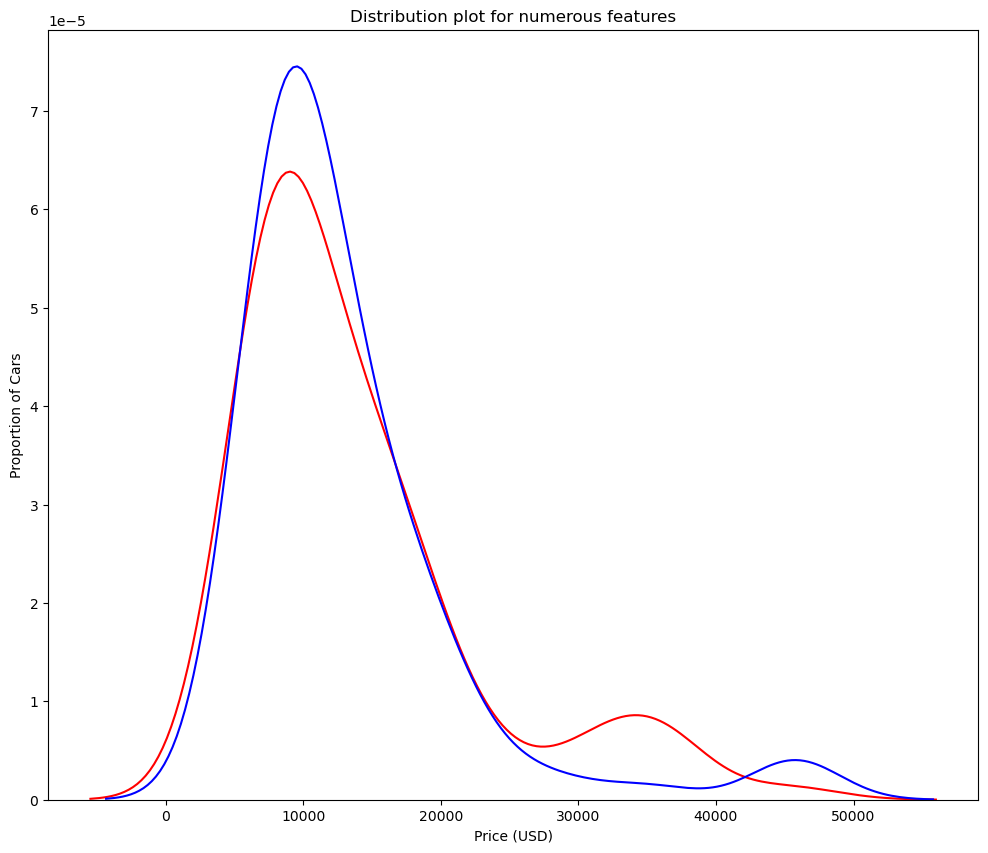

In [45]:
#distribution_plot(y_train,yhat_train, "Actual Values(Train)", "Predicted Values (Train)", Title)
yhat_test1 = poly1.predict(x_test_pr1)
Title = 'Distribution plot for numerous features'
distribution_plot(y_test,yhat_test1, "Actual Values(Test)", "Predicted Values(Test)",Title)

In [46]:
pr = PolynomialFeatures(degree=2)
x_train_pr = pr.fit_transform(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg', 'normalized-losses', 'symboling']])
x_test_pr = pr.fit_transform(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg', 'normalized-losses', 'symboling']])


In [47]:
from sklearn.linear_model import Ridge 

In [48]:
ridge_model = Ridge(alpha=1)

In [49]:
ridge_model.fit(x_train_pr,y_train)

Ridge(alpha=1)

In [50]:
yhat = ridge_model.predict(x_test_pr)

In [51]:
print('Predicted - {}\nTest Set - {}'.format(yhat[:4], y_test[:4].values))

Predicted - [13438.69934493 17420.36317308  6196.35009677 19480.61925098]
Test Set - [ 6295. 10698. 13860. 13499.]


In [52]:
print(x_train_pr.shape, y_train.shape)
print(x_test_pr.shape, y_test.shape)

(110, 28) (110,)
(110, 28) (91,)


In [53]:
from tqdm import tqdm

rsqu_test = []
rsqu_train = []
dummy1 = []
Alpha = 10*np.array(range(0,1000))
pbar = tqdm(Alpha)
count = 0
for i in range(91):
    count+=1
    ridge_model = Ridge(alpha=Alpha[i])
    ridge_model.fit(x_train_pr,y_train)
    test_score, train_score = ridge_model.score(x_test_pr,y_test), ridge_model.score(x_train_pr, y_train)
    pbar.set_postfix({'Test Score': test_score, 'Train Score': train_score})
    rqsu_test.append(test_score)
    rqsu_train.append(train_score)

  0%|                                                  | 0/1000 [00:00<?, ?it/s]

ValueError: Found input variables with inconsistent numbers of samples: [91, 110]

In [54]:
from sklearn.model_selection import GridSearchCV

In [55]:
params1 = [{'alpha':[.001,.1,1,10,100,1000,10000,100000]}]

In [56]:
RR = Ridge()
RR

Ridge()

In [57]:
Grid1 = GridSearchCV(RR, params1, cv=4)
Grid1.fit(x_data[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_data)

GridSearchCV(cv=4, estimator=Ridge(),
             param_grid=[{'alpha': [0.001, 0.1, 1, 10, 100, 1000, 10000,
                                    100000]}])

In [58]:
BestRR = Grid1.best_estimator_
BestRR

Ridge(alpha=10000)

In [59]:
BestRR.score(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_test)

0.8411649831036151

In [60]:
params2 = [{'alpha':[.001,.1,1,10,100,1000,10000,100000]}]
Grid2 = GridSearchCV(Ridge(), params2, cv=4)
Grid2.fit(x_data[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_data)
best_alpha = Grid2.best_params_['alpha']
best_ridge_model = Ridge(alpha=best_alpha)
b = best_ridge_model.fit(x_data[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_data)
print('The best alpha is {}\nBest Ridge Model - {}'.format(best_alpha,b))

The best alpha is 10000
Best Ridge Model - Ridge(alpha=10000)


[{'alpha': [0.001, 0.1, 1, 10, 100, 1000, 10000, 100000]}]

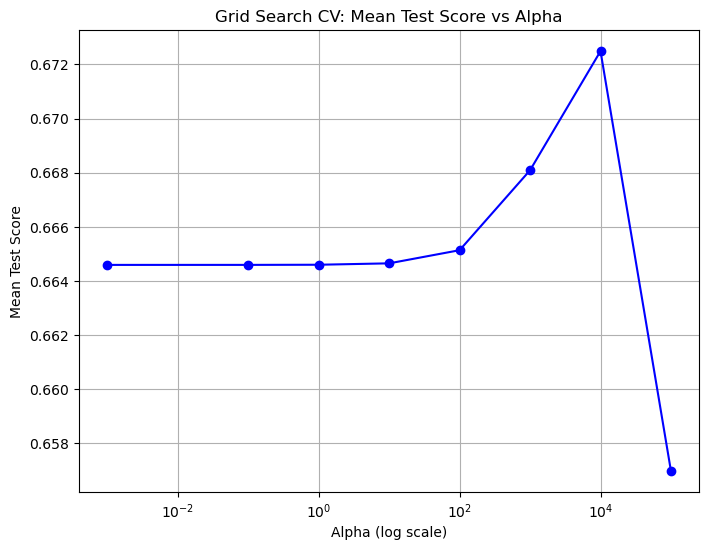

In [68]:
mean_test_scores = Grid2.cv_results_['mean_test_score']
alpha_values = Grid2.param_grid[0]['alpha']

# Plotting the results
plt.figure(figsize=(8, 6))
plt.plot(alpha_values, mean_test_scores, marker='o', linestyle='-', color='b')
plt.xscale('log')  # Use log scale for alpha values
plt.xlabel('Alpha (log scale)')
plt.ylabel('Mean Test Score')
plt.title('Grid Search CV: Mean Test Score vs Alpha')
plt.grid(True)
plt.show()